In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 

In [5]:
def plot_regrets(arrs, labels, data, T = 1000): 
    """
    in: 
        arrs: list of regrets [n,T] 
        labels: list of str 
    """
    n = len(arrs)
    cmap = plt.cm.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    cinv = cmap.N / (1. * n) 
    markers=['.','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

     #arrs[0].shape[-1]
    fig, ax = plt.subplots(figsize=(4, 3), nrows=1, ncols=1)
    t = np.arange(T)
    xs = np.arange(T)
    for i, arr, l in zip(range(n), arrs, labels):
        arr = arr[:,:T] # truncate as different algo can have different iteration length 
        mean = np.mean(arr, axis=0)
        std = np.std(arr, axis=0) / np.sqrt(arr.shape[0])
        ax.plot(xs, mean, label=l, marker=markers[i % len(markers)], markevery=500, color=colors[int((i+0.5)*cinv)]) 
        ax.fill_between(xs, mean + 1.96*std, mean-1.96*std, alpha=0.1, color=colors[int((i+0.5)*cinv)])

    ax.set_title('{}'.format(data))
    ax.set_xlim([0,T])
    # ax.set_ylim([0,500])
    ax.set_xlabel('K') 
    ax.set_ylabel('Total regret')
    ax.grid('on')
    plt.legend()
    plt.tight_layout()
    plt.show()


    return fig 

algo: LinLCB, n: 5
algo: LinPER, n: 5
algo: NeuralPR, n: 5


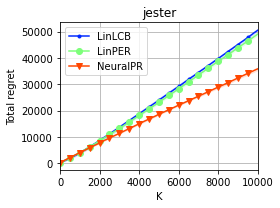

In [6]:
data = 'jester'
func_label = data
result_path = os.path.join('/scratch/tnguy258/neuralofflinerl/results', data)
# algos = ['NeuralUCB', 'NeuralTS', 'NeuralPR', 'NeuralBoot', 'NeuralGreedy', 'NeuralRandVI', 'NeuralRandEx'] 
# algos = ['LinLCB', 'LinPER', 'NeuralGreedy',  'NeuraLCB', 'NeuraLCBDiag', 'NeuralPR'] 
# algo_labels = ['LinLCB', 'LinPER', 'NeuralGreedy',  'NeuraLCB', 'NeuraLCB (Diagonal)', 'NeuralPER'] 
algos = ['LinLCB', 'LinPER', 'NeuralPR']
algo_labels = algos 

T = 10000
arrs = []
upd_times = [] 
act_select_times = []
for algo in algos: 
    arr = []
    upd_time = [] 
    act_select_time = []
    data_path = os.path.join(result_path, algo) 
    n = len(glob.glob1(data_path,"*.npz"))
    # n = 1
    print('algo: {}, n: {}'.format(algo, n))
    for i in range(n): 
        tmp = np.load(os.path.join(result_path, algo, 'trial={}.npz'.format(i)))
        arr.append(tmp['arr_0']) 

        # Only use the first trial to count elapsed time as running multiple trials does not give a reliable measure of time
        # After running for each algo to get reget, run each algo one more time with trial=0 only to get a measure of time
        if i == 0: 
            upd_time.append(tmp['arr_1'])
            act_select_time.append(tmp['arr_2']) 
    
    arr = np.array(arr) # (n,T)
    # print(arr.shape)
    upd_time = np.mean(np.array(upd_time), axis=0) 
    act_select_time = np.mean(np.array(act_select_time), axis=0)
    # print(act_select_time.shape)
    arrs.append(arr)
    upd_times.append(upd_time)
    act_select_times.append(act_select_time) # (n_algo, T)
fig = plot_regrets(arrs, algo_labels, func_label, T=T)
fig.savefig(os.path.join(result_path, '{}_regret.png'.format(data)), bbox_inches='tight', dpi=400)

IndexError: invalid index to scalar variable.

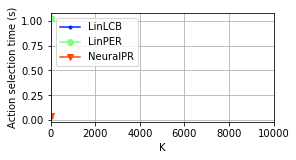

In [4]:
n = 3
cmap = plt.cm.get_cmap('jet')
colors = cmap(np.arange(cmap.N))
cinv = cmap.N / (1. * n) 
markers=['.','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

fig = plt.figure(figsize=(4,2))
for j,i in enumerate([-3,-2,-1]):
    plt.plot(act_select_times[i], label=algo_labels[i],marker=markers[j % len(markers)], markevery=100, color=colors[int((j+0.5)*cinv)])

plt.grid('on')
plt.xlabel('K') 
plt.ylabel('Action selection time (s)')

plt.legend(loc='upper left')
plt.xlim([0,T])
plt.ylim([-50, act_select_times[-3][T] ])
fig.savefig(os.path.join(result_path, '{}_time.png'.format(data)), bbox_inches='tight', dpi=400)